## Finding the bounding box of a list of points

In [ ]:
# list of points in the form of (x,y)
myPoints = [[4.17, 4.47], [7.83, 4.96], [2.84, 7.09],\
            [2.63, 1.48], [2.88, 1.73], [6.08, 4.81],\
            [5.65, 8.91], [2.30, 6.71], [1.01, 0.99], [8.97, 0.81]]

In [37]:
# set the initial min, max values

min_x = myPoints[0][0]
min_y = myPoints[0][1]

max_x = myPoints[0][0]
max_y = myPoints[0][1]

#get max value by iteration

for i in range(1, len(myPoints)):
    if min_x > myPoints[i][0]:
        min_x = myPoints[i][0]
    if min_y > myPoints[i][1]:
        min_y = myPoints[i][1]
    if max_x < myPoints[i][0]:
        max_x = myPoints[i][0]
    if max_y < myPoints[i][1]:
        max_y = myPoints[i][1]    
# printing the mix_x, max_x, min_y and max_y
print('max_x is: {0:1.2f} and max_y is {1:1.2f}'.format(max_x,max_y))
print('min_x is: {0:1.2f} and min_y is {1:1.2f}'.format(min_x,min_y))


max_x is: 8.97 and max_y is 8.91
min_x is: 1.01 and min_y is 0.81


# Tuples

In [41]:
myTup = ('Martin','orange', 1)

In [42]:
type(myTup)

tuple

In [44]:
myTup[0]

'Martin'

In [45]:
myTup[0] = "Jane"

TypeError: 'tuple' object does not support item assignment

In [47]:
myList = list(myTup)
myList

['Martin', 'orange', 1]

In [51]:
myList[2] = "Joe"
myList

['Jane', 'orange', 'Joe']

In [52]:
myList.sort()
myList

['Jane', 'Joe', 'orange']

In [54]:
myTuple = tuple(myList)
myTuple

('Jane', 'Joe', 'orange')

In [55]:
myTuple.sort()

AttributeError: 'tuple' object has no attribute 'sort'

In [56]:
for element in myTuple:
    print(element)

Jane
Joe
orange


## Loading trajectories

In [ ]:
import csv

In [57]:
# The first line in the data is the header
with open('./sydneyTrips.csv', 'r') as inFile:
    data = list(csv.reader(inFile))

In [58]:
type(data)

list

In [ ]:
data

In [60]:
header = data[0]
points = data[1:]
points[0]

['85fda09c8f7a91f6f0aef7906620d845',
 '1cbc979b609b4ab5b21c94d53c840d35',
 '2/10/15 7:51',
 '16829903.19',
 '-4009790.912',
 '']

In [61]:
header

['p_deviceid', 'p_sessionid', 'timestamp', 'x', 'y', 'speed']

### Question: What is the type of elements in data?

In [62]:
# x,y index in the points list
x = 3
y = 4


p_x = []
p_y = []

for point in points:
    p_x.append(point[x])
    p_y.append(point[y])

# list comprehension
p_x = [float(point[x]) for point in points]
p_y = [float(point[y]) for point in points]

In [65]:
len(points)

2363

In [64]:
len(p_x)

2363

## Plotting the trajectories

this requires Bokeh installed - you can use the yml file provided.

In [67]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [92]:
from trajPlot import PlotPoints
from bokeh.resources import INLINE
from bokeh.io import output_notebook, reset_output, export_png
output_notebook(INLINE)

Loading BokehJS ...

In [93]:
PlotPoints(p_x,p_y)

In [72]:
# finding the trajectories with the same session ID 
# dictionaries will be discussed in future lectures
id = 1 #session id index
trips = {}
for point in points:
    sID = point[id]
    if sID in trips.keys():
        trips[sID].append(point)
    else:    
        trips[sID] = [point]

In [73]:
colors = ['blue', 'brown', 'green', 'indigo', 'red', 'cyan', 'darkred']
i = 0
for id, trip in trips.items():
    print (id)
    p_x = [float(point[x]) for point in trip]
    p_y = [float(point[y]) for point in trip]
    PlotPoints(p_x,p_y, colors[i], 5)
    i+=1
    

1cbc979b609b4ab5b21c94d53c840d35


4d4b1230f3bc427690ab78902c6d8e44


93145b1aae2c446ba4f6a19550745adc


a445e8c09d804583961a6a5dc74dc746


ab397eed16de4ab08a1d486b646d0923


ca3f7cccf203436aa6e44594620b94cd


d9db457ff15b4b66ac8812bd38c61f32


## Stops and Moves episodes

### Question: Can we infer **mode of transport** with the help of individual plots?

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
trips

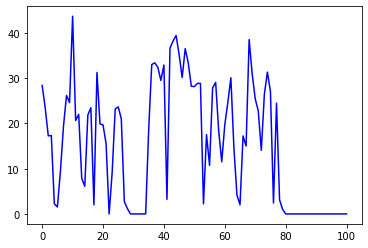

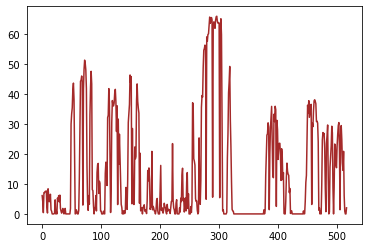

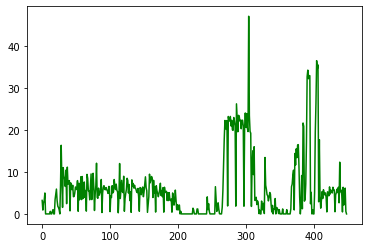

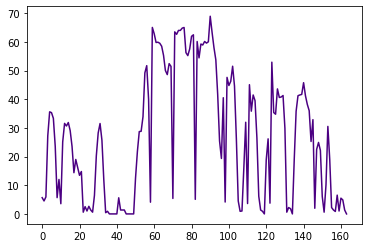

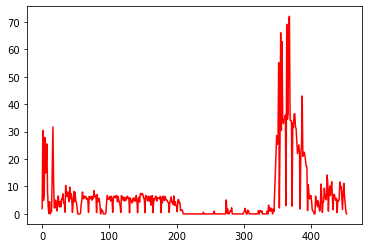

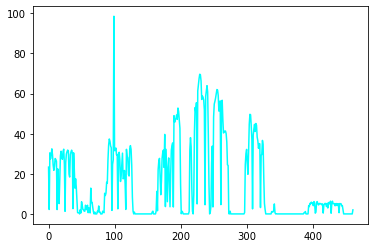

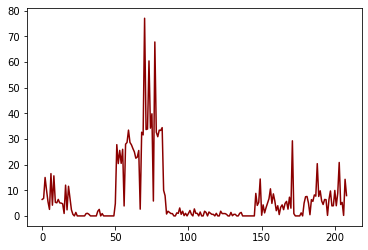

In [77]:
colors = ['blue', 'brown', 'green', 'indigo', 'red', 'cyan', 'darkred']
i = 0
s = 5
for id, trip in trips.items():
    plt.clf()
    speed = [float(point[s]) for point in trip if point[s] != '']
    plt.plot(range(len(speed)), speed, c = colors[i])
    i+=1
    plt.show()
    
    

    

In [78]:
# plotting the stationary parts of trajectories
speed = [float(point[s]) for point in points if point[s] != '']
speed[0]

28.3905863

In [79]:
stops = [i for i in speed if i < 2]

In [ ]:
stops

### Challenge: find the x,y information of the points with a speed less/more than a threshold and plot them using PlotPoints

###  Question: Do the points represent **meaningful** stop points?

In [ ]:
# Move episodes: Highways


## Putting it altogether: changes in the bounding box area 

In [84]:
# a nicer function for defining the bounding box
# you can return multiple values from a function
def bbox(myPoints):
    '''
    list of list -> min_x, max_x, ,min_y, max_y 
    Function to compute the bounding box of a list of lists, representing points in 2D
    '''
    p_x = [point[0] for point in myPoints]
    p_y = [point[1] for point in myPoints]
    return min(p_x), max(p_x), min(p_y), max(p_y)
    
 

In [ ]:
def bboxArea(minX, maxX, minY, maxY):
    return (maxX - minX)*(maxY - minY)


In [85]:
help(bbox)

Help on function bbox in module __main__:

bbox(myPoints)
    list of list -> min_x, max_x, ,min_y, max_y 
    Function to compute the bounding box of a list of lists, representing points in 2D



In [83]:
help(list)

Help on class list in module builtins:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self))

In [88]:
box_pts = bbox(myPoints)
type(box_pts)

tuple

In [89]:
min_x,min_y, max_x, max_y = bbox(myPoints)

In [90]:
min_x

1.01

In [ ]:
bbox(myPoints)

In [ ]:
# you can extract the tupple values out 
# to individual values in one go
minX, maxX, minY, maxY = bbox(myPoints)

In [ ]:
minX

In [ ]:
test = bbox(myPoints)
test